# Predict salary for years experience

Salary - Dependent and Years of Experience - Independent.  The dataset has two columns — number of years of work experience, and the salary for that experience. Our goal is to build a model which will learn on this dataset and will be able to predict the salary for a given number of years of experience.

In [80]:
# Import the necessary libraries
import numpy
import matplotlib.pyplot as plot
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression




In [115]:
# Import the dataset

dataset = pd.read_csv('salaryData.csv')

x = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values



In [116]:
dataset.shape # it is give numbers of rows and columns in whole data set

(30, 2)

In [117]:
dataset

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [118]:
dataset.count() # its counts how many samples are in each columns

YearsExperience    30
Salary             30
dtype: int64

In [119]:
dataset.describe()# it give overall information about statics or descriptive statics of whole dataset

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [120]:
dataset.dtypes # checking the types of columns

YearsExperience    float64
Salary               int64
dtype: object

In [121]:
dataset.YearsExperience.min()# its give minimum value of YearsExperience

1.1

In [122]:
dataset.YearsExperience.max() # its give maximum value of YearsExperience

10.5

In [123]:
dataset.YearsExperience.mean() # its give mean or average value of YearsExperience

5.3133333333333335

In [124]:
dataset.YearsExperience.median() # its give median value or center most data point  of YearsExperience

4.7

In [125]:
dataset.YearsExperience.mode() # its give most frequent observation of YearsExperience

0    3.2
1    4.0
dtype: float64

In [126]:
dataset.Salary.value_counts()

56957     1
112635    1
56642     1
60150     1
43525     1
83088     1
81363     1
113812    1
121872    1
122391    1
39891     1
91738     1
64445     1
98273     1
67938     1
37731     1
46205     1
57189     1
61111     1
116969    1
54445     1
66029     1
105582    1
39343     1
55794     1
93940     1
101302    1
109431    1
57081     1
63218     1
Name: Salary, dtype: int64

In [127]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [128]:
f = lambda x:x +1 # apply the lamda function

In [129]:
dataset["YearsExperience2"]= dataset.YearsExperience.apply(f)

In [130]:
dataset[["YearsExperience","YearsExperience2"]]

,YearsExperience,YearsExperience2
0,1.1,2.1
1,1.3,2.3
2,1.5,2.5
3,2.0,3.0
4,2.2,3.2
5,2.9,3.9
6,3.0,4.0
7,3.2,4.2
8,3.2,4.2
9,3.7,4.7


In [131]:
dataset= dataset.sort_values(by='YearsExperience', axis=0, ascending=True)# sorting the vlaue by YearsExperience

In [132]:
dataset=dataset.reset_index(drop=True)# reset the index

In [133]:
dataset

,YearsExperience,Salary,YearsExperience2
0,1.1,39343,2.1
1,1.3,46205,2.3
2,1.5,37731,2.5
3,2.0,43525,3.0
4,2.2,39891,3.2
5,2.9,56642,3.9
6,3.0,60150,4.0
7,3.2,54445,4.2
8,3.2,64445,4.2
9,3.7,57189,4.7


In [134]:
dataset.drop(['YearsExperience2'] ,axis=1, inplace=True)# drop the YerasExperience2 columns

In [202]:
dataset

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [203]:
x = dataset.iloc[:,:-1].values# it taking the columns Yearsof experience

In [204]:
x#years of experience

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [230]:
y#salary

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

In [206]:
#dataset

In [231]:
# Split the dataset into the training set and test set
# We're splitting the data in 1/3, so out of 30 rows, 20 rows will go into the training set,
# and 10 rows will go into the testing set.
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/3, random_state = 0)




In [232]:
xTrain

array([[ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [233]:
 yTrain

array([ 56642,  66029,  64445,  61111, 113812,  91738,  46205, 121872,
        60150,  39891,  81363,  93940,  57189,  54445, 105582,  43525,
        39343,  98273,  67938,  56957], dtype=int64)

In [234]:
dataset

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [235]:
xTest # tseting data

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9]])

In [236]:
yTest # True label for testing data

array([ 37731, 122391,  57081,  63218, 116969, 109431, 112635,  55794,
        83088, 101302], dtype=int64)

In [222]:
# Creating a LinearRegression object and fitting it
# on our trainging set.
linearRegressor = LinearRegression()
#fit means CREATE AND EQUATION , CREATE MODEL, TRAIN THE MODEL
linearRegressor.fit(xTrain, yTrain)
#y = .1x + 3.3


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [237]:
# Predicting the test set results
yPrediction = linearRegressor.predict(xTest)
yPrediction = pd.DataFrame(yPrediction, columns=["Predicted"])
yPrediction.head(5)

,Predicted
0,40835.105909
1,123079.399408
2,65134.556261
3,63265.367772
4,115602.645454


In [244]:
yTest = pd.DataFrame(yTest)
yTest =yTest.rename(columns={0:'Salary'})

In [245]:
yTest

,Salary
0,37731
1,122391
2,57081
3,63218
4,116969
5,109431
6,112635
7,55794
8,83088
9,101302


In [246]:
df1 = pd.DataFrame(yTest)
df2 = pd.DataFrame(yPrediction)

In [265]:
df3=pd.concat([df1,df2], axis=1, ignore_index=True)# concatnatiing two differents columns of two different dataframe
df3=df3.rename(columns={0:'Salary',1:'Predicted_Salary'})# give the columns name 0: salary and 1 : Predicted Salary
df3

,Salary,Predicted_Salary
0,37731,40835.105909
1,122391,123079.399408
2,57081,65134.556261
3,63218,63265.367772
4,116969,115602.645454
5,109431,108125.891499
6,112635,116537.239698
7,55794,64199.962017
8,83088,76349.687193
9,101302,100649.137545


In [287]:
#df1 = pd.DataFrame(xTrain)
#df2 = pd.DataFrame(yTrain)
df3 = pd.DataFrame(xTest)
df4 = pd.DataFrame(yTest)
df5 = pd.DataFrame(yPrediction)

In [291]:
df6=pd.concat([df3,df4,df5], axis=1, ignore_index=True)# concatnatiing two differents columns of two different dataframe
df6=df6.rename(columns={0:'Actual_YearsExperience',1:'Actual_salary',2:'Predicted-salary'})# give the columns name 0: salary and 1 : Predicted Salary
df6

,Actual_YearsExperience,Actual_salary,Predicted-salary
0,1.5,37731,40835.105909
1,10.3,122391,123079.399408
2,4.1,57081,65134.556261
3,3.9,63218,63265.367772
4,9.5,116969,115602.645454
5,8.7,109431,108125.891499
6,9.6,112635,116537.239698
7,4.0,55794,64199.962017
8,5.3,83088,76349.687193
9,7.9,101302,100649.137545


In [292]:
print(xTest)

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]
 [ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]]


In [293]:
print(linearRegressor.predict(xTest))

[ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


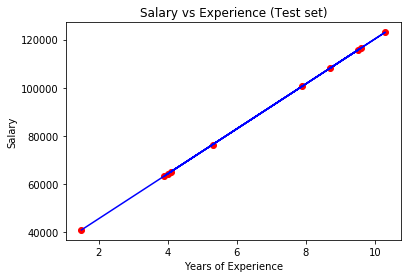

In [294]:
# Visualising the test set results
plot.scatter(xTest, yPrediction, color = 'red')
plot.plot(xTest, linearRegressor.predict(xTest), color = 'blue')
plot.title('Salary vs Experience (Test set)')
plot.xlabel('Years of Experience')
plot.ylabel('Salary')
plot.show()

In [296]:
print(xTrain)

[[ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]]


In [297]:
print( linearRegressor.predict(xTrain))

[ 53919.42532909  74480.49870396  56723.20806202  68872.93323808
 103452.92027763  90368.60085726  38965.91742009 124948.58789682
  54854.0195734   47377.2656189   81957.25265845  82891.84690277
  61396.17928358  56723.20806202 110929.67423213  45508.07713028
  37096.72893147  93172.3835902   72611.31021533  64199.96201652]


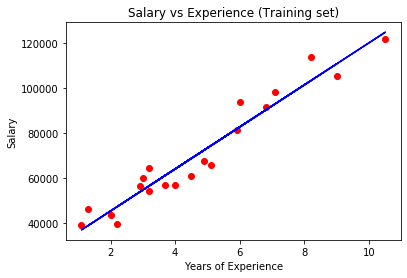

In [295]:
# Visualising the training set results
plot.scatter(xTrain, yTrain, color = 'red')
plot.plot(xTrain, linearRegressor.predict(xTrain), color = 'blue')
plot.title('Salary vs Experience (Training set)')
plot.xlabel('Years of Experience')
plot.ylabel('Salary')
plot.show()



In [300]:
print(xTest)

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]
 [ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]]


In [301]:
print(yTest)

   Salary
0   37731
1  122391
2   57081
3   63218
4  116969
5  109431
6  112635
7   55794
8   83088
9  101302


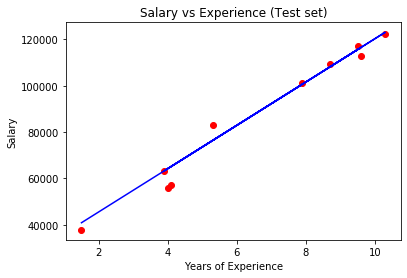

In [298]:
# Visualising the test set results
plot.scatter(xTest, yTest, color = 'red')
plot.plot(xTest, linearRegressor.predict(xTest), color = 'blue')
plot.title('Salary vs Experience (Test set)')
plot.xlabel('Years of Experience')
plot.ylabel('Salary')
plot.show()

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [299]:
from sklearn.metrics import r2_score
r2_score(yTest, yPrediction, sample_weight=None, multioutput='uniform_average')

0.9749154407708353